(demo2022-07-06)=
# Demo Notebook 2022-07-06

Demos from the live sessions on 2022-07-06.


## Setup

Ye olde setup chunk below.


In [1]:
import grama as gr
import pandas as pd
import numpy as np
DF = gr.Intention()
%matplotlib inline


In [2]:
from grama.data import df_stang_wide
df_stang_wide

,thick,E_00,mu_00,E_45,mu_45,E_90,mu_90,alloy
0,0.022,10600,0.321,10700,0.329,10500,0.310,al_24st
1,0.022,10600,0.323,10500,0.331,10700,0.323,al_24st
2,0.032,10400,0.329,10400,0.318,10300,0.322,al_24st
3,0.032,10300,0.319,10500,0.326,10400,0.330,al_24st
4,0.064,10500,0.323,10400,0.331,10400,0.327,al_24st
5,0.064,10700,0.328,10500,0.328,10500,0.320,al_24st
6,0.081,10000,0.315,10000,0.320,9900,0.314,al_24st
7,0.081,10100,0.312,9900,0.312,10000,0.316,al_24st
8,0.081,10000,0.311,-1,-1.000,9900,0.314,al_24st


## Wrangling Data

In [3]:
df_stang = (
    df_stang_wide
    ## Single-call pivoting of the data
    >> gr.tf_pivot_longer(
        columns=["E_00", "mu_00", "E_45", "mu_45", "E_90", "mu_90"],
        names_to=[".value", "angle"],
        names_sep="_"
    )
    ## Filter out the invalid values
    >> gr.tf_filter(DF.E > 0)
    ## Convert angle values to numeric
    >> gr.tf_mutate(
        angle=gr.as_float(DF.angle)
    )
)

df_stang

/Users/zach/Git/py_grama/grama/tran_pivot.py:570: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,thick,alloy,angle,E,mu
0,0.022,al_24st,0.0,10600.0,0.321
1,0.022,al_24st,45.0,10700.0,0.329
2,0.022,al_24st,90.0,10500.0,0.310
3,0.022,al_24st,0.0,10600.0,0.323
4,0.022,al_24st,45.0,10500.0,0.331
5,0.022,al_24st,90.0,10700.0,0.323
6,0.032,al_24st,0.0,10400.0,0.329
7,0.032,al_24st,45.0,10400.0,0.318
8,0.032,al_24st,90.0,10300.0,0.322
9,0.032,al_24st,0.0,10300.0,0.319


In [4]:
df_stang_invalid = (
    df_stang_wide
    ## Single-call pivoting of the data
    >> gr.tf_pivot_longer(
        columns=["E_00", "mu_00", "E_45", "mu_45", "E_90", "mu_90"],
        names_to=[".value", "angle"],
        names_sep="_"
    )
    ## Leave in the invalid values
    # >> gr.tf_filter(DF.E > 0)
    ## Convert angle values to numeric
    >> gr.tf_mutate(
        angle=gr.as_float(DF.angle)
    )
)

df_stang_invalid

/Users/zach/Git/py_grama/grama/tran_pivot.py:570: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,thick,alloy,angle,E,mu
0,0.022,al_24st,0.0,10600.0,0.321
1,0.022,al_24st,45.0,10700.0,0.329
2,0.022,al_24st,90.0,10500.0,0.310
3,0.022,al_24st,0.0,10600.0,0.323
4,0.022,al_24st,45.0,10500.0,0.331
5,0.022,al_24st,90.0,10700.0,0.323
6,0.032,al_24st,0.0,10400.0,0.329
7,0.032,al_24st,45.0,10400.0,0.318
8,0.032,al_24st,90.0,10300.0,0.322
9,0.032,al_24st,0.0,10300.0,0.319


Note that observation `df_stang_invalid.index == 25` has `E == -1`, which is not a valid number for this material property.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-E-mu-incorrect.png


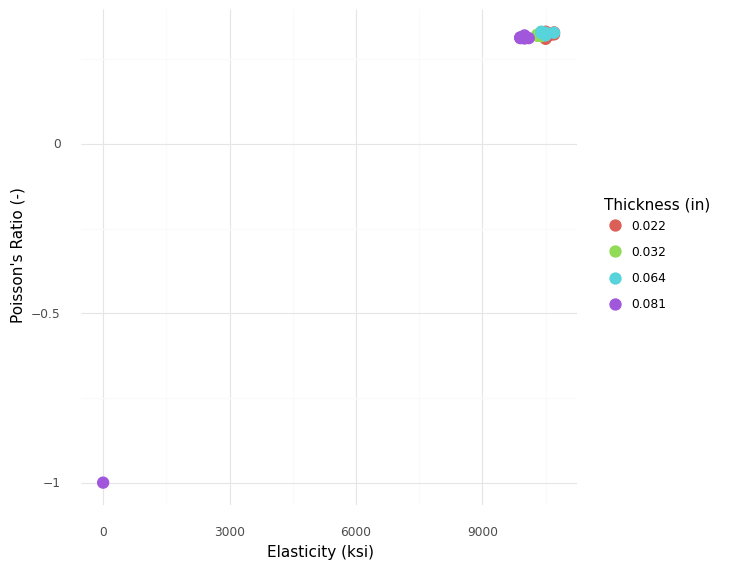

<ggplot: (8766095560424)>

In [5]:
# NOTE: No need to edit; run and inspect
p = (
    df_stang_invalid
    >> gr.ggplot(gr.aes("E", "mu", color="factor(thick)"))
    + gr.geom_point(size=4)
    
    + gr.scale_color_discrete(name="Thickness (in)")
    + gr.theme_minimal()
    + gr.theme(aspect_ratio=1)
    + gr.labs(
        x="Elasticity (ksi)",
        y="Poisson's Ratio (-)",
    )
)
p.save("stang-E-mu-incorrect.png")
p

Note that the invalid value heavily skews the plot, making it difficult to see trends in the dataset. This does help us detect that one of the values is incorrect, though!


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-E-mu.png


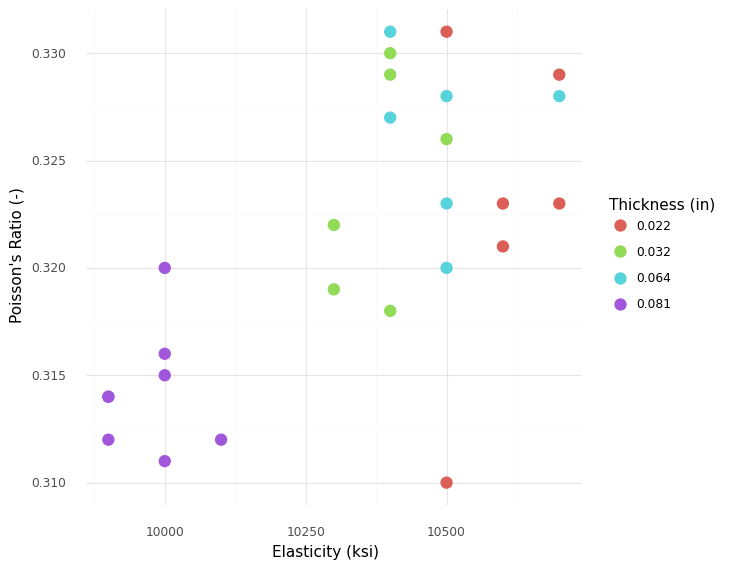

<ggplot: (8766079044100)>

In [6]:
# NOTE: No need to edit; run and inspect
p = (
    df_stang
    >> gr.ggplot(gr.aes("E", "mu", color="factor(thick)"))
    + gr.geom_point(size=4)
    
    + gr.scale_color_discrete(name="Thickness (in)")
    + gr.theme_minimal()
    + gr.theme(aspect_ratio=1)
    + gr.labs(
        x="Elasticity (ksi)",
        y="Poisson's Ratio (-)",
    )
)
p.save("stang-E-mu.png")
p

## Explanatory Patterns

Plotting `E` against `t` directly helps us assess the supposed pattern.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-cf.png


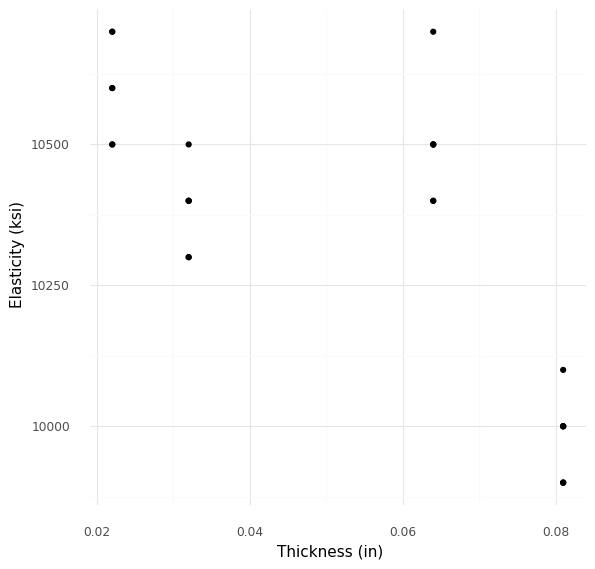

<ggplot: (8766133993735)>

In [7]:
p = (
    df_stang
    >> gr.ggplot(gr.aes("thick", "E"))
    + gr.geom_point()
    + gr.theme_minimal()
    + gr.theme(
        aspect_ratio=1,
    )
    + gr.labs(
        x="Thickness (in)",
        y="Elasticity (ksi)",
    )
)
p.save("stang-cf.png")
p

Already, this pattern doesn't look very convincing; the intermediate thickness plates (`t ~= 0.06`) do not follow the downward trend in `E`.

/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-cf-lm.png


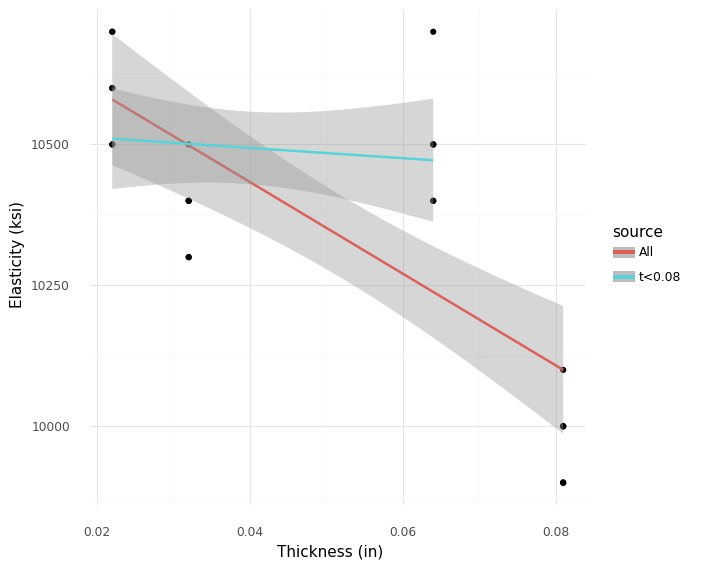

<ggplot: (8766079043079)>

In [8]:
p = (
    df_stang
    >> gr.ggplot(gr.aes("thick", "E"))
    + gr.geom_point()
    + gr.geom_smooth(
        data=df_stang
        >> gr.tf_mutate(source="All"),
        mapping=gr.aes(color="source"),
        method="lm"
    )
    + gr.geom_smooth(
        data=df_stang
        >> gr.tf_filter(DF.thick <= 0.08)
        >> gr.tf_mutate(source="t<0.08"),
        mapping=gr.aes(color="source"),
        method="lm"
    )
    + gr.theme_minimal()
    + gr.theme(
        aspect_ratio=1,
    )
    + gr.labs(
        x="Thickness (in)",
        y="Elasticity (ksi)",
    )
)
p.save("stang-cf-lm.png")
p

A more formal way to test the supposed trend is to fit a pair of lines, one with and one without the thickest plates. Here we can see that the line fitted without the thickest plates does not have a significantly downward slope.


## Considering Variability

The following code shows how to make the "targeted" figures I showed in the presentation.


In [9]:
md_plate = (
    gr.Model("Plate critical buckling stress")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            k_cr=(df.m * df.b / df.a + df.a / df.m / df.b)**2
        ),
        var=["a", "b", "m"],
        out=["k_cr"],
    )
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            sigma_cr=df.k_cr * (np.pi**2/12) * df.E*1e3 / (1 - df.mu**2)
                    *(df.t / df.b)**2
        ),
        var=["k_cr", "E", "mu", "t", "b"],
        out=["sigma_cr"]
    )
)

md_plate

model: Plate critical buckling stress

  inputs:
    var_det:
      b: (unbounded)
      a: (unbounded)
      t: (unbounded)
      mu: (unbounded)
      m: (unbounded)
      E: (unbounded)

    var_rand:

    copula:
      None

  functions:
      f0: ['a', 'b', 'm'] -> ['k_cr']
      f1: ['k_cr', 'E', 'mu', 't', 'b'] -> ['sigma_cr']

/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-q7.png


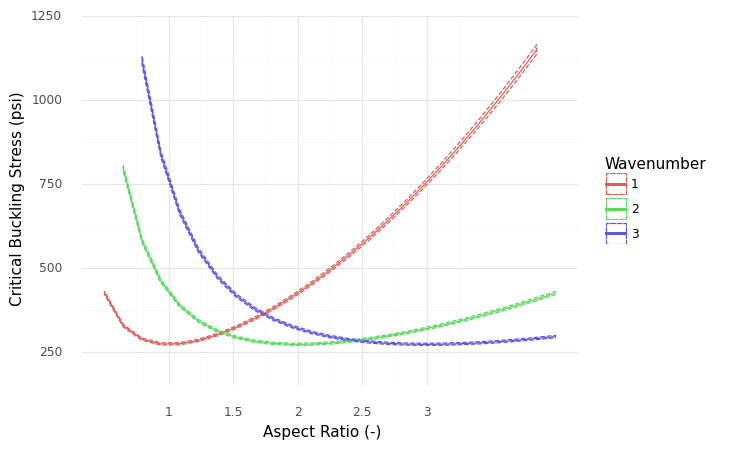

<ggplot: (8766079085629)>

In [10]:
p = (
    df_stang
    >> gr.tf_filter(DF.thick == 0.032)
    >> gr.tf_rename(t="thick")
    
    # Sweep over additional variables
    >> gr.tf_outer(
        df_outer=gr.df_grid(
            m=[1, 2, 3],
            a=gr.linspace(6, 48, 25),
            b=12,
        )
    )
    # Use the model as a transformation (evaluation synonym)
    >> gr.tf_md(md_plate)
    
    # Compute summaries
    >> gr.tf_group_by(DF.a, DF.m, DF.b)
    >> gr.tf_summarize(
        sigma_cr_min=gr.min(DF.sigma_cr),
        sigma_cr_mean=gr.mean(DF.sigma_cr),
        sigma_cr_max=gr.max(DF.sigma_cr),
    )
    
    # Visualize the results
    >> gr.ggplot(gr.aes("a / b", color="factor(m)"))
    + gr.geom_ribbon(
        gr.aes(ymin="sigma_cr_min", ymax="sigma_cr_max"),
        linetype="dashed",
        fill=None,
    )
    + gr.geom_line(gr.aes(y="sigma_cr_mean"))
    
    + gr.scale_x_continuous(breaks=[1, 1.5, 2, 2.5, 3])
    + gr.scale_y_continuous(limits=(200, 1200))
    + gr.scale_color_discrete(name="Wavenumber")
    + gr.theme_minimal()
    + gr.labs(
        x="Aspect Ratio (-)",
        y="Critical Buckling Stress (psi)"
    )
)
p.save("stang-q7.png")
p

We can make a more targeted figure to focus on the relevant comparison (`AR == 1.0` vs `AR == 1.5`).


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-q7-zoom.png


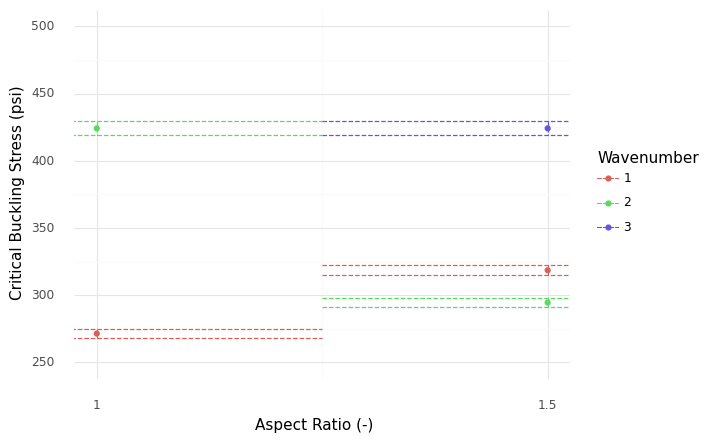

<ggplot: (8766095694734)>

In [11]:
p = (
    df_stang
    >> gr.tf_filter(DF.thick == 0.032)
    >> gr.tf_rename(t="thick")
    
    # Sweep over additional variables
    >> gr.tf_outer(
        df_outer=gr.df_grid(
            m=[1, 2, 3],
            a=[12 * 1, 12 * 1.5],
            b=12,
        )
    )
    # Use the model as a transformation (evaluation synonym)
    >> gr.tf_md(md_plate)
    
    # Compute summaries
    >> gr.tf_group_by(DF.a, DF.m, DF.b)
    >> gr.tf_summarize(
        sigma_cr_min=gr.min(DF.sigma_cr),
        sigma_cr_mean=gr.mean(DF.sigma_cr),
        sigma_cr_max=gr.max(DF.sigma_cr),
    )
    
    # Visualize the results
    >> gr.ggplot(gr.aes("a / b", color="factor(m)"))
    + gr.geom_errorbar(
        gr.aes(ymin="sigma_cr_min", ymax="sigma_cr_max"),
        linetype="dashed",
        # fill=None,
    )
    + gr.geom_point(gr.aes(y="sigma_cr_mean"))
    
    + gr.scale_x_continuous(breaks=[1, 1.5, 2, 2.5, 3])
    + gr.scale_y_continuous(limits=(200, 1200))
    + gr.coord_cartesian(
        xlim=(1.0, 1.5),
        ylim=(250, 500),
    )
    + gr.scale_color_discrete(name="Wavenumber")
    + gr.theme_minimal()
    + gr.labs(
        x="Aspect Ratio (-)",
        y="Critical Buckling Stress (psi)"
    )
)
p.save("stang-q7-zoom.png")
p

The case `AR == 1` clearly has a lower buckling stress than the lowest `AR == 1.5` case; independent of the material variability, we can determine that `AR == 1.5` is a better choice for our application.

*In this sense*, the material variability does not matter *for the purposes of choosing between `AR == 1.0` and `AR == 1.5`*.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-q8.png


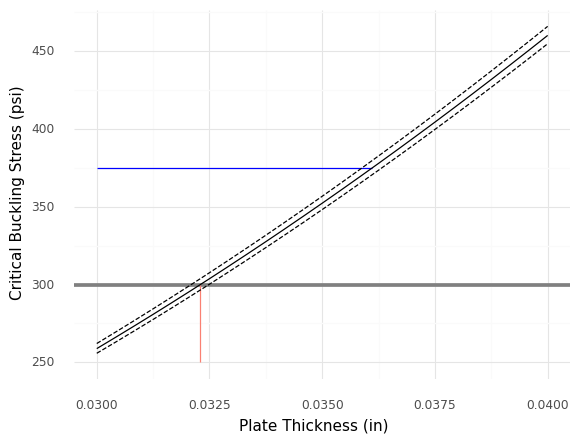

<ggplot: (8766113690871)>

In [12]:
p = (
    df_stang
    >> gr.tf_filter(DF.thick == 0.032)
    >> gr.tf_drop("thick")
    
    # Sweep over thicknesses
    >> gr.tf_outer(
        df_outer=gr.df_grid(
            t=gr.linspace(0.030, 0.04, 25),
            a=12 * 1.5,
            b=12,
            m=2,
        )
    )
    
    # Use model as a transform
    >> gr.tf_md(md_plate)
    
    # Compute summaries
    >> gr.tf_group_by(DF.t)
    >> gr.tf_summarize(
        sigma_cr_min=gr.min(DF.sigma_cr),
        sigma_cr_mean=gr.mean(DF.sigma_cr),
        sigma_cr_max=gr.max(DF.sigma_cr),
    )
    
    # Visualize
    >> gr.ggplot(gr.aes("t"))
    + gr.geom_hline(yintercept=300, color="grey", size=1.5)
    + gr.geom_segment(
        data=gr.df_make(
            t=0.0323,
            y=300-50,
            yend=300,
        ),
        mapping=gr.aes("t", "y", xend="t", yend="yend"),
        color="salmon",
    )
    + gr.geom_segment(
        data=gr.df_make(
            y=300 * 1.25,
            t=0.03,
            tend=0.0361,
        ),
        mapping=gr.aes("t", "y", xend="tend", yend="y"),
        color="blue",
    )
    + gr.geom_line(gr.aes(y="sigma_cr_min"), linetype="dashed")
    + gr.geom_line(gr.aes(y="sigma_cr_mean"))
    + gr.geom_line(gr.aes(y="sigma_cr_max"), linetype="dashed")
    
    + gr.theme_minimal()
    + gr.labs(
        x="Plate Thickness (in)",
        y="Critical Buckling Stress (psi)"
    )
)
p.save("stang-q8.png")
p

/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-q8-zoom.png


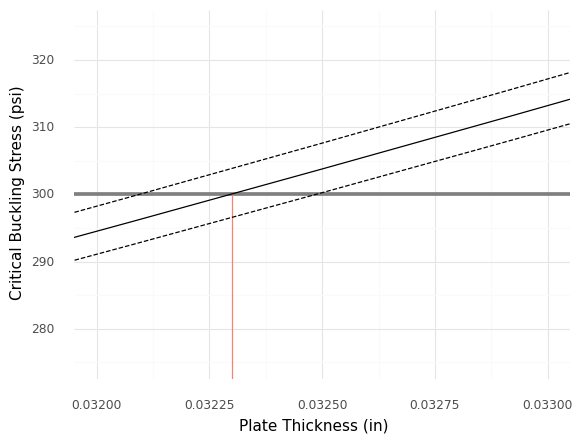

<ggplot: (8766079311192)>

In [13]:
p = (
    df_stang
    >> gr.tf_filter(DF.thick == 0.032)
    >> gr.tf_drop("thick")
    
    # Sweep over thicknesses
    >> gr.tf_outer(
        df_outer=gr.df_grid(
            t=gr.linspace(0.030, 0.04, 25),
            a=12 * 1.5,
            b=12,
            m=2,
        )
    )
    
    # Use model as a transform
    >> gr.tf_md(md_plate)
    
    # Compute summaries
    >> gr.tf_group_by(DF.t)
    >> gr.tf_summarize(
        sigma_cr_min=gr.min(DF.sigma_cr),
        sigma_cr_mean=gr.mean(DF.sigma_cr),
        sigma_cr_max=gr.max(DF.sigma_cr),
    )
    
    # Visualize
    >> gr.ggplot(gr.aes("t"))
    + gr.geom_hline(yintercept=300, color="grey", size=1.5)
    + gr.geom_segment(
        data=gr.df_make(
            t=0.0323,
            y=300-50,
            yend=300,
        ),
        mapping=gr.aes("t", "y", xend="t", yend="yend"),
        color="salmon",
    )
    + gr.geom_segment(
        data=gr.df_make(
            y=300 * 1.25,
            t=0.03,
            tend=0.0361,
        ),
        mapping=gr.aes("t", "y", xend="tend", yend="y"),
        color="blue",
    )
    + gr.geom_line(gr.aes(y="sigma_cr_min"), linetype="dashed")
    + gr.geom_line(gr.aes(y="sigma_cr_mean"))
    + gr.geom_line(gr.aes(y="sigma_cr_max"), linetype="dashed")
    
    + gr.coord_cartesian(
        xlim=(0.032, 0.033),
        ylim=(275, 325),
    )
    + gr.theme_minimal()
    + gr.labs(
        x="Plate Thickness (in)",
        y="Critical Buckling Stress (psi)"
    )
)
p.save("stang-q8-zoom.png")
p